In [63]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [64]:
#Reading and loading the data
data=pd.read_csv(r"C:\Users\Priyanka\Downloads\Micro-Credit-Project (1)\Micro Credit Project\Data file.csv")

In [65]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [66]:
data.isnull().values.any()

False

No null values in the dataset.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

1. All the features have 209595 non-null entries.
2. msisdn, pcircle and pdate features are of object datatype, other are of either float or int.

Handling negative data:
The dataset has negative values which are not realistic in context with the data provided. Here replacing the negative values with the absolute of the same as negative data seems relevant to the other data.

In [68]:
list=[]
for i in data.columns:
    if data[i].dtypes!='object':
        list.append(i)

In [69]:
list

['Unnamed: 0',
 'label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [70]:
for x in list:
        data[x]=abs(data[x])

In [71]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


Lets visualize the outliers through boxplot as visualizing the features is not easy with outliers. 

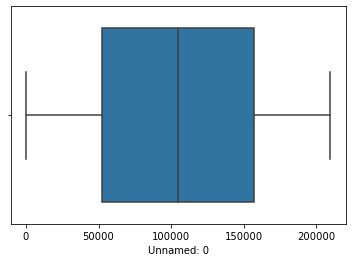

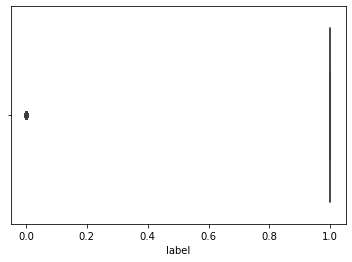

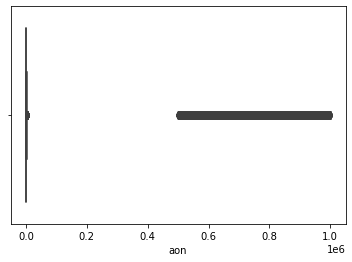

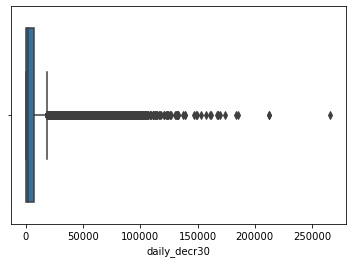

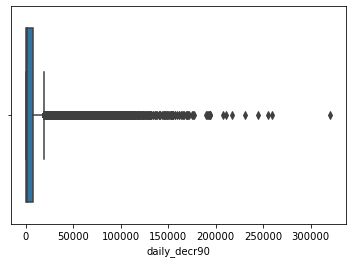

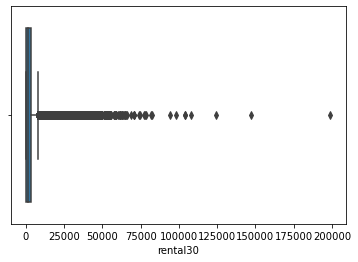

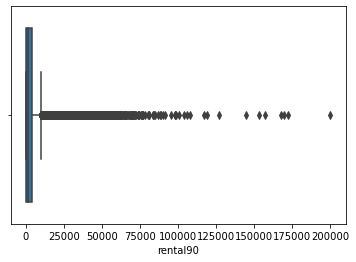

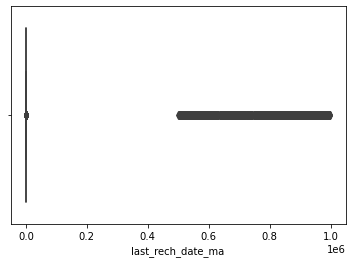

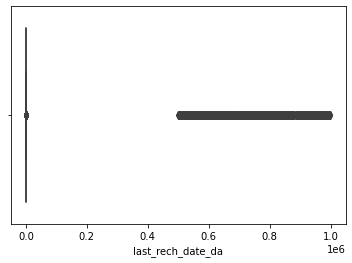

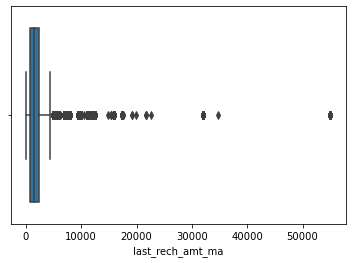

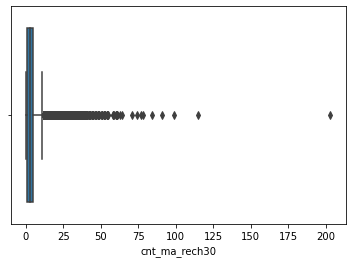

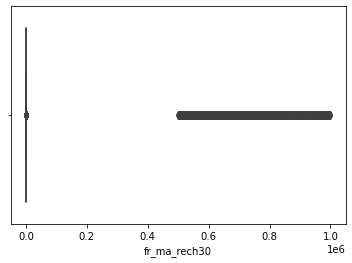

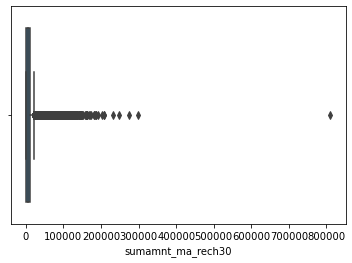

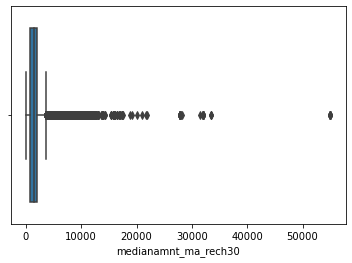

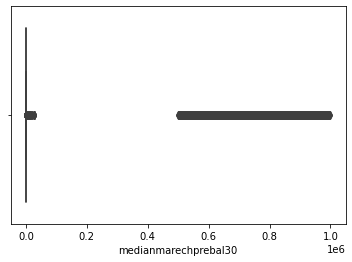

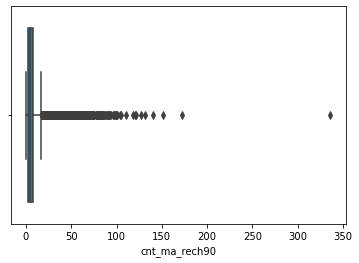

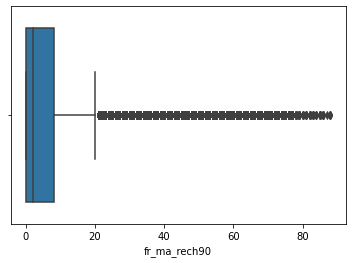

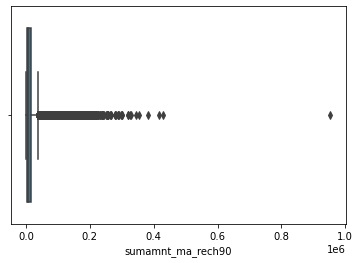

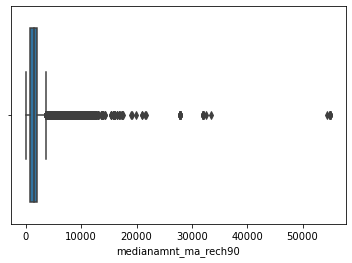

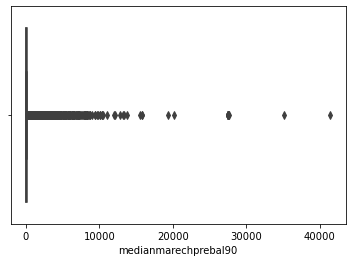

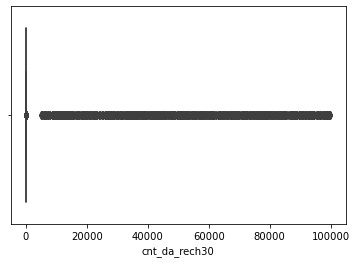

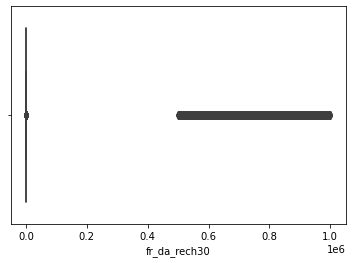

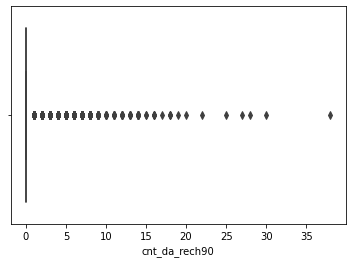

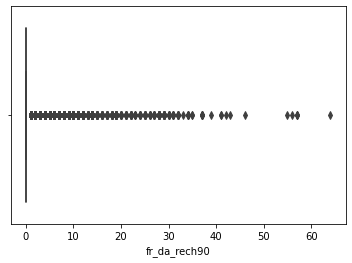

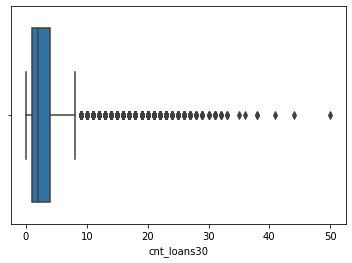

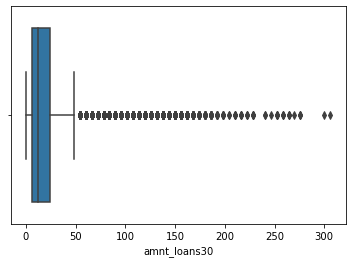

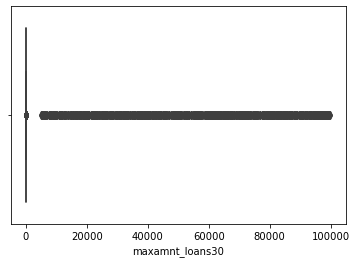

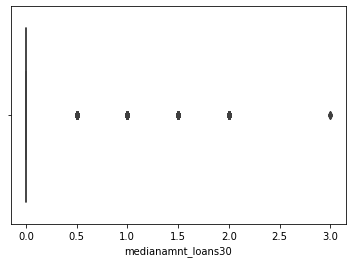

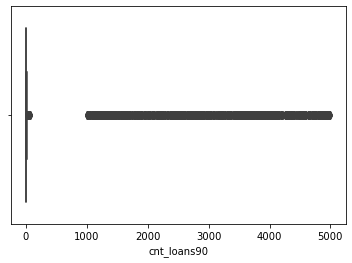

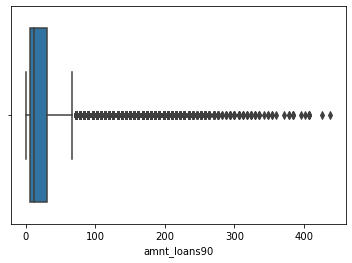

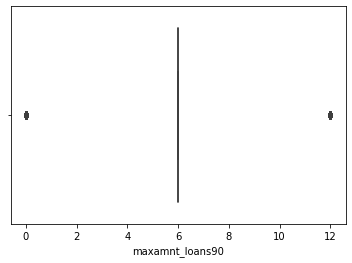

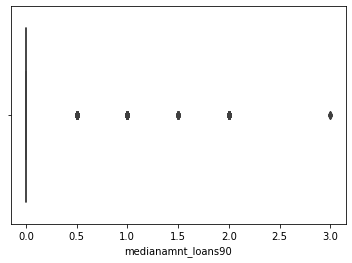

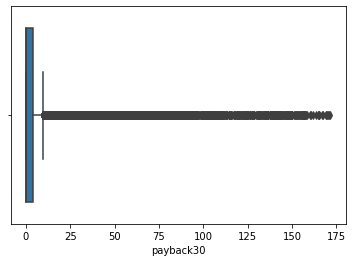

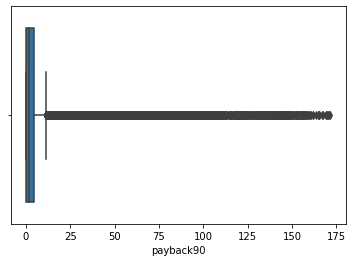

In [72]:
for i in data:
    if data[i].dtypes!='object':
        sns.boxplot(data[i])
        plt.show()

OBSERVATION:
    1. label features has values either 0 or 1, with very minimum entries as 0 because of which in the graph here 0 is treated as outlier or noise but the data is just imbalanced. We cannot lose entries 0.
    2. Features :aon, last_rech_date_ma, last_rech_date_da, fr_ma_rech30, cnt_da_rech30, fr_da_rech30, maxamnmt_loans30 and cnt_loans90 have outliers according to my observed patterns else other features have a continuous data ranging over large ranges which are falling above 75 percentile for that reason almost every feature is reflecting outliers in the boxplot. If treated all the features for outliers we might lose some critical information.

Two features pdate and msisdn are  not in a format to give some information. Formatting these two features before removing outliers.

In [73]:
#Creating a new DataFrame with split function
new=data['pdate'].str.split("-",n=2,expand=True)

In [74]:
#Making separate date and month column with the new data frame and also converting them to int datatype as to avoid any error or unexpected result.
data['date']=new[2].astype('int')
data['month']=new[1].astype('int')
data.drop('pdate',axis=1,inplace=True)

In [75]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,date,month
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17,6
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12,6
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29,7
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25,7


MSISDN:
1. msisdn is a number uniquely identifying a network subscription in a global system for mobile communications. msisdn is an important number for identifying a mobile subscriber. In simple words it is the mapping of the telephone number to the sim card in a mobile phone. msisdn comrpises of the county code, national destination code and subscriber number.
2. lets split the msisdn column by 'I' which in my thinking indicates the country indonesia and is present in all the entries. 

In [76]:
#Splitting msisdn
mobile_new=data['msisdn'].str.split("I",n=1,expand=True)

In [77]:
mobile_new[0].value_counts()

30080    14
12071    13
96067    13
74584    12
23184    12
         ..
62200     1
23001     1
26646     1
22817     1
74083     1
Name: 0, Length: 84580, dtype: int64

In [78]:
mobile_new[1].value_counts()

70373    2336
82739    2322
70786    2306
84456    2267
70377    2255
         ... 
70602       1
92675       1
94518       1
97022       1
94107       1
Name: 1, Length: 887, dtype: int64

1. Now that the mobile number is split we can observe that the uniqueness in the entries has reduced by a greater level. Machine might be able to create a pattern out of it now.
2. Also it can be observed that length of mobile_new[1] is 887 quite lesser than the length of mobile_new[0] so i am assuming that mobile_new[1] indicates the geographical code and mobile_new[0] indicates the subscriber number.

In [79]:
data['region_code']=mobile_new[1].astype('int')
data['subscriber_number']=mobile_new[0].astype('int')

In [80]:
data.drop('msisdn',axis=1,inplace=True)

In [81]:
data

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,date,month,region_code,subscriber_number
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6,0.0,29.000000,29.000000,UPW,20,7,70789,21408
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12,0.0,0.000000,0.000000,UPW,10,8,70374,76462
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6,0.0,0.000000,0.000000,UPW,19,8,70372,17943
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6,0.0,0.000000,0.000000,UPW,6,6,70781,55773
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6,0.0,2.333333,2.333333,UPW,22,6,82730,3813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6,0.0,1.000000,1.000000,UPW,17,6,85348,22758
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6,0.0,1.000000,1.000000,UPW,12,6,84455,95583
209590,209591,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,54,12,0.0,4.000000,3.833333,UPW,29,7,85350,28556
209591,209592,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,24,12,0.0,0.000000,10.500000,UPW,25,7,82733,59712


In [82]:
data['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [83]:
data['Unnamed: 0'].value_counts()

2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64

The feature pcircle holds a constant value for each rows. This feature is not going to help machine learn anything. This feature is a redundant feature. Dropping it so as to have lesser columns.

feature Unnamed: 0 is just the index feature, unique to every row. Machine will find it difficult to draw a pattern using this feature. Droppping Unnamed: 0 too.

In [84]:
#Dropping Unnamed 0: and pcircle
data.drop(['Unnamed: 0','pcircle'],axis=1,inplace=True)

In [85]:
data.shape

(209593, 37)

# REMOVING OUTLIERS

According to my analysis of the data features: aon, last_rech_date_ma, last_rech_date_da, fr_ma_rech30, cnt_da_rech30, fr_da_rech30, maxamnmt_loans30 and cnt_loans90 have outliers.
Attempt 1. Tried to remove outliers using zscore lost over 15% of the data which is not good amount to lose.
Attempt 2. Used IQR to remove the outliers but as IQR works on percentile there was loss of some values that were not outliers in context with the data. For e.g. feature maxamnt_loans30 is a feature with either 0,6 and 12 as entries. 6 made almost the data between 25th and 75th percentile, IQR technique removed the columns bearing values 0 and 12 which were actually important to consider. Many other features lost some of very important information required to draw a pattern for machine learning.
Now I will take these eight features bearing outliers one by one and will look into the last meaningful value according to the data and will drop all the values above the meaningful values. This is a tedious work but it will make sure no loss of any relevant data is made apart from outliers.

In [86]:
#For feature aon last meaningful value is 2440 dropping all the values above 2440.
data=data[(data['aon']<2441)]
data.shape

(207504, 37)

In [87]:
#last_rech_date_ma has 113 value before the outliers start. So dropping rows having entry of last_rech_date_ma above 113.
data=data[(data['last_rech_date_ma']<114)]
data.shape

(206468, 37)

In [88]:
#last_rech_date_da has 115 last meaningful entry. So keeping rows having entry of last_rech_date_da uptil 115.
data=data[(data['last_rech_date_da']<116)]
data.shape

(205435, 37)

In [89]:
#fr_ma_rech30 has last valid entry 38. So keeping only those rows which have entry of uptil 38..
data=data[(data['fr_ma_rech30']<38)]
data.shape

(204350, 37)

In [90]:
#cnt_da_rech30 has 34 highest entry value before the outliers start. So keeping rows having entry of cnt_da_rech30 uptil 34.
data=data[(data['cnt_da_rech30']<34)]
data.shape

(203324, 37)

In [91]:
#fr_da_rech30 has 25 highest entry value before the outliers start. So keeping rows having entry of fr_da_rech30 uptil 25.
data=data[(data['fr_da_rech30']<25)]
data.shape

(202308, 37)

In [92]:
#maxamnt_loans30 has either 0, 6 and 12 as entries anything apart fom these is an outlier. So keeping rows having these three entries.
data=data[(data['maxamnt_loans30']<13)]
data.shape

(201293, 37)

In [93]:
#cnt_loans90 has 71 as highest entry value before the outliers start. So keeping rows having entry of cnt_loans90 uptil 71.
data=data[(data['cnt_loans90']<71)]
data.shape

(200292, 37)

Initially the shape was 209593,37 now the shape is 200292,37 which is only 4.4% loss of the data.

STATISTICAL ANALYSIS:

In [94]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month,region_code,subscriber_number
count,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,...,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000,200292.000000
mean,0.875027,655.505412,5382.706651,6084.262546,2716.757610,3511.321369,6.255557,0.938724,2063.686258,3.976489,...,3.693088,23.643311,6.704721,0.045998,3.399516,4.322831,14.395842,6.797990,84465.668938,49751.718870
std,0.330689,498.742358,9221.125027,10924.454550,4299.912729,5757.726886,9.460665,7.057467,2362.845923,4.250142,...,4.025984,26.458253,2.104884,0.200450,8.821619,10.320099,8.437712,0.741349,7788.958595,28905.820839
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,70370.000000,4.000000
25%,1.000000,243.000000,42.492833,42.720000,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000,82733.000000,24648.000000
50%,1.000000,519.000000,1478.000000,1500.010000,1096.440000,1349.100000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000,85349.000000,49083.000000
75%,1.000000,963.000000,7246.897667,7803.875000,3362.807500,4210.342500,7.000000,0.000000,2309.000000,5.000000,...,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,7.000000,90583.000000,75031.000000
max,1.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,113.000000,115.000000,55000.000000,203.000000,...,68.000000,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,8.000000,99993.000000,99998.000000


Observations:
    1. mean for column- label is 0.875 we can say that label being a binary data with value either 0 or 1 is highly imbalanced as 1 constitues more than 75% of the data.
    2.mean for columns- aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_data_da, last_rech_amt_ma, cnt_loan90, amnt_loans90 is more than the 50th percentil(median) which indicates that the data is right skewed.
    3. Standard deviation for the columns- aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_data_da, last_rech_amt_ma, cnt_loan90,amnt_loans90, payback90, region_code, subscriber_number is quite higher.

Now that outliers are removed for 8 features, lets visualize some of the independant features with the target variable to see if there persists any relation.

# VISUALIZATION

1. Label 

1    175261
0     25031
Name: label, dtype: int64


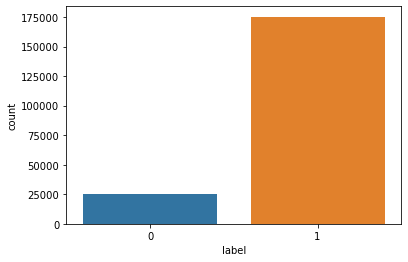

In [95]:
sns.countplot(data['label'])
print(data['label'].value_counts())

The target variable lable can easily be observed as an imbalanced feature with count for label 1 comprising of over 83% of the data.

2. AON- Age on number

In [96]:
#To analyze aon-age on number better here mapping the entries in days to range of year format.
labels=['0 year','1 year','2 year','3 year','4 year','5 year','6 year']
bins=[0,365,730,1095,1460,1825,2190,2440]
age=pd.cut(data['aon'],bins=bins,labels=labels)
age.value_counts()

0 year    74695
1 year    52269
2 year    33566
3 year    23744
4 year     9875
5 year     5368
6 year      775
Name: aon, dtype: int64

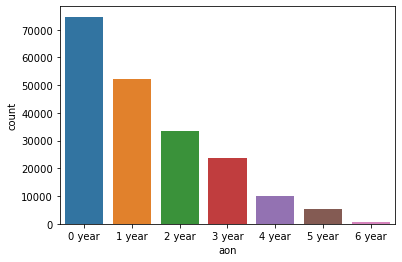

In [97]:
sns.countplot(age)

We can observe a declining pattern in the users count as the years increases i.e. mostly the users are new.

3. Label v/s aon

In [98]:
tab1=pd.crosstab(data['label'],age)
tab1

aon,0 year,1 year,2 year,3 year,4 year,5 year,6 year
label,,,,,,,
0,11939,5940,3389,2260,981,468,54
1,62756,46329,30177,21484,8894,4900,721


Text(0, 0.5, 'number of users')

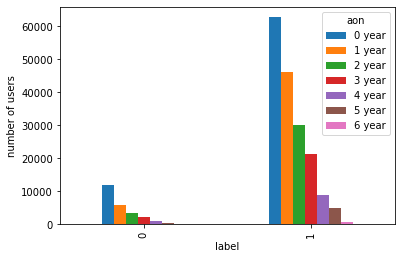

In [99]:
tab1.plot(kind='bar')
plt.ylabel('number of users')

OBSERVATION:
As highest count of user falls in the range of 0 year i.e. they are new to the network, we can observe counts for both label 1 and label 0 at highest. And counts for both the label decreases further as the years on network increases. There might be a pattern and dependancy of target variable with aon.

4. rental30- credit or loans taken in 30 days.

In [100]:
#To analyze rental30 on number better here mapping the entries in days to a range of amounts.
labels=['below 5k','below 10k','below 15k','below 20k','below 25k','below 30k','below 35k','below 40k','below 45k','below 50k','below 55k']
bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000]
rental=pd.cut(data['rental30'],bins=bins,labels=labels)
rental.value_counts()

below 5k     160200
below 10k     20585
below 15k      7453
below 20k      3003
below 25k      1022
below 30k       399
below 35k       148
below 40k        92
below 45k        56
below 50k        35
below 55k        21
Name: rental30, dtype: int64

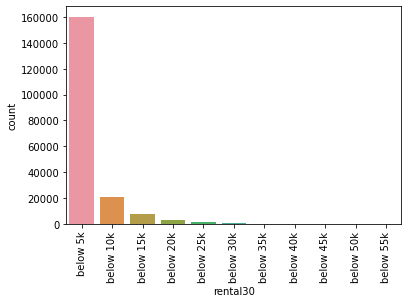

In [101]:
plt.xticks(rotation=90)
sns.countplot(rental)

Mostly the users have taken credit of below 5k the count for the same sums at around 1,60,200.

5. label v/s rental30

In [102]:
tab2=pd.crosstab(data['label'],rental)
tab2

rental30,below 5k,below 10k,below 15k,below 20k,below 25k,below 30k,below 35k,below 40k,below 45k,below 50k,below 55k
label,,,,,,,,,,,
0,18553,1906,698,218,90,28,24,10,7,8,1
1,141647,18679,6755,2785,932,371,124,82,49,27,20


Text(0.5, 1.0, 'label v/s rental30')

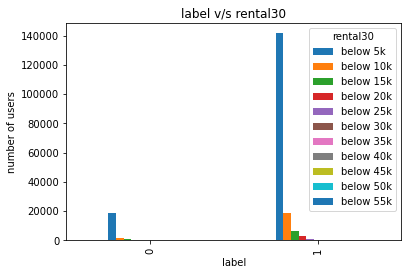

In [103]:
tab2.plot(kind='bar')
plt.ylabel('number of users')
plt.title('label v/s rental30')

OBSERVATION::
Mostly users have taken a loan below 5000 therefore we can see count of users at highest for both the labels under 5000 credit. The counts decreases for both the labels as amount of credit increases.

6. last_rech_date_ma

In [104]:
#To analyze last_rech_date_ma (which is the days till last recharge in main account) better here mapping the entries in days to a range format.
labels=['0-10 days','11-20 days','21-30 days','31-40 days','41-50 days','51-60 days','61-70 days','71-80 days','81-90 days','91-100 days','101-110 days','111-120 days']
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120]
last_recharge=pd.cut(data['last_rech_date_ma'],bins=bins,labels=labels)
last_recharge.value_counts()

0-10 days       147938
11-20 days       19046
21-30 days        6593
31-40 days        3223
41-50 days        1925
51-60 days         846
61-70 days         400
71-80 days         226
81-90 days         122
91-100 days         30
101-110 days        12
111-120 days         2
Name: last_rech_date_ma, dtype: int64

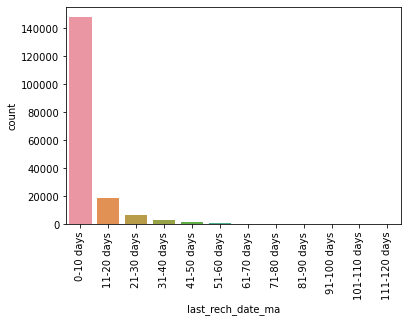

In [105]:
plt.xticks(rotation=90)
sns.countplot(last_recharge)

We can observe that mostly users have frequently recharged their number almost 1,45,000 user have recharged under 10 days.

7. label v/s last_rech_date_ma

In [106]:
tab3=pd.crosstab(data['label'],last_recharge)
tab3

last_rech_date_ma,0-10 days,11-20 days,21-30 days,31-40 days,41-50 days,51-60 days,61-70 days,71-80 days,81-90 days,91-100 days,101-110 days,111-120 days
label,,,,,,,,,,,,
0,10058,3005,1402,798,502,230,134,129,80,0,0,0
1,137880,16041,5191,2425,1423,616,266,97,42,30,12,2


Text(0, 0.5, 'no. of days since last recharge')

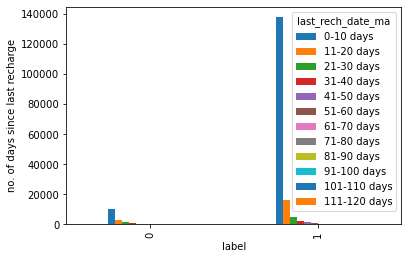

In [107]:
tab3.plot(kind='bar')
plt.ylabel('no. of days since last recharge')

OBSERVATION:
    For label 0 and label 1 a higher count of users can be seen who have recharged in last 10 days. Count decreases as the days keeps on increasing. As both labels are simultaneausly going down it might have any dependance on target variable or might not. It cannot be concluded with surity. 

8. fr_ma_rech30

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

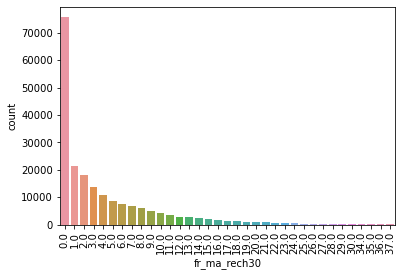

In [108]:
sns.countplot(data['fr_ma_rech30'])
plt.xticks(rotation=90)

A higher count of users can be observed for 0 value of fr_rech_ma30 which tells about the frequency with which the user recharged the number. Count of users decreases as frequency increases.

9. label v/s fr_ma_rech30

In [109]:
tab4=pd.crosstab(data['label'],data['fr_ma_rech30'])
tab4

fr_ma_rech30,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,25.0,26.0,27.0,28.0,29.0,30.0,34.0,35.0,36.0,37.0
label,,,,,,,,,,,,,,,,,,,,,
0,18804,925,684,590,470,395,418,334,340,261,...,27,24,20,11,7,1,0,1,0,0
1,56839,20573,17423,13159,10269,8230,7081,6300,5519,4640,...,312,312,218,185,144,61,68,84,80,57


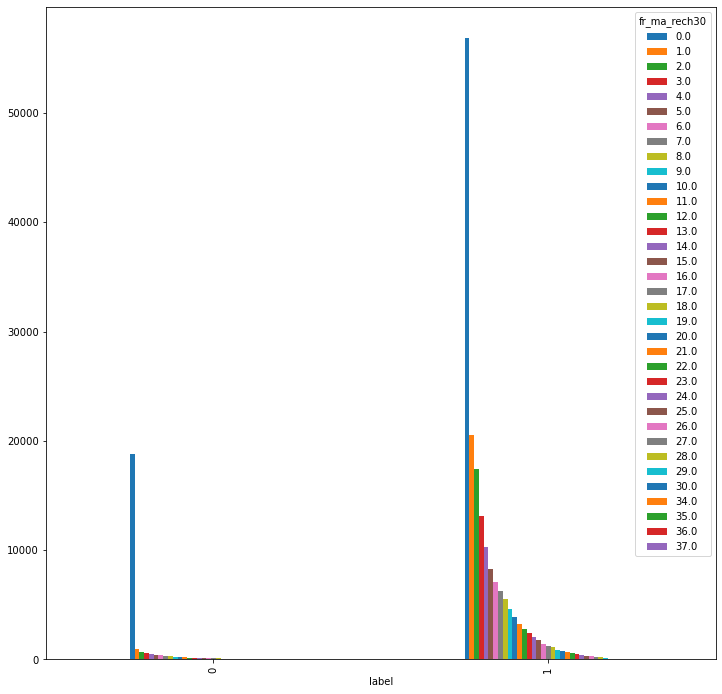

In [110]:
fig,ax=plt.subplots(figsize=(12,12))
tab4.plot(kind='bar',width=0.5,ax=ax)

OBSERVATION:
Higher number of users have 0 frequency for both the  lables, which decreases further with increase in the frequency. Also, relation between label and frequency of recharge in 30 days cannot be surely made as both the lables see a similar pattern.

10. cnt_ma_rech30

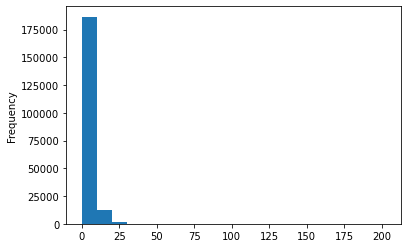

In [111]:
data['cnt_ma_rech30'].plot.hist(bins=20)

feature cnt_ma_rech30 holds moslty the entries between 0-25.

11. label v/s cnt_ma_rech30

In [112]:
tab5=pd.crosstab(data['label'],data['cnt_ma_rech30'])
tab5

cnt_ma_rech30,0,1,2,3,4,5,6,7,8,9,...,63,64,71,74,77,78,84,91,99,203
label,,,,,,,,,,,,,,,,,,,,,
0,10621,7364,3134,1563,852,529,318,203,124,83,...,0,0,0,0,0,0,0,0,0,0
1,16146,28293,26641,22800,18471,14653,11103,8481,6477,4941,...,1,1,1,1,1,1,1,1,1,1


Text(0.5, 1.0, 'label v/s cnt_ma_rech30')

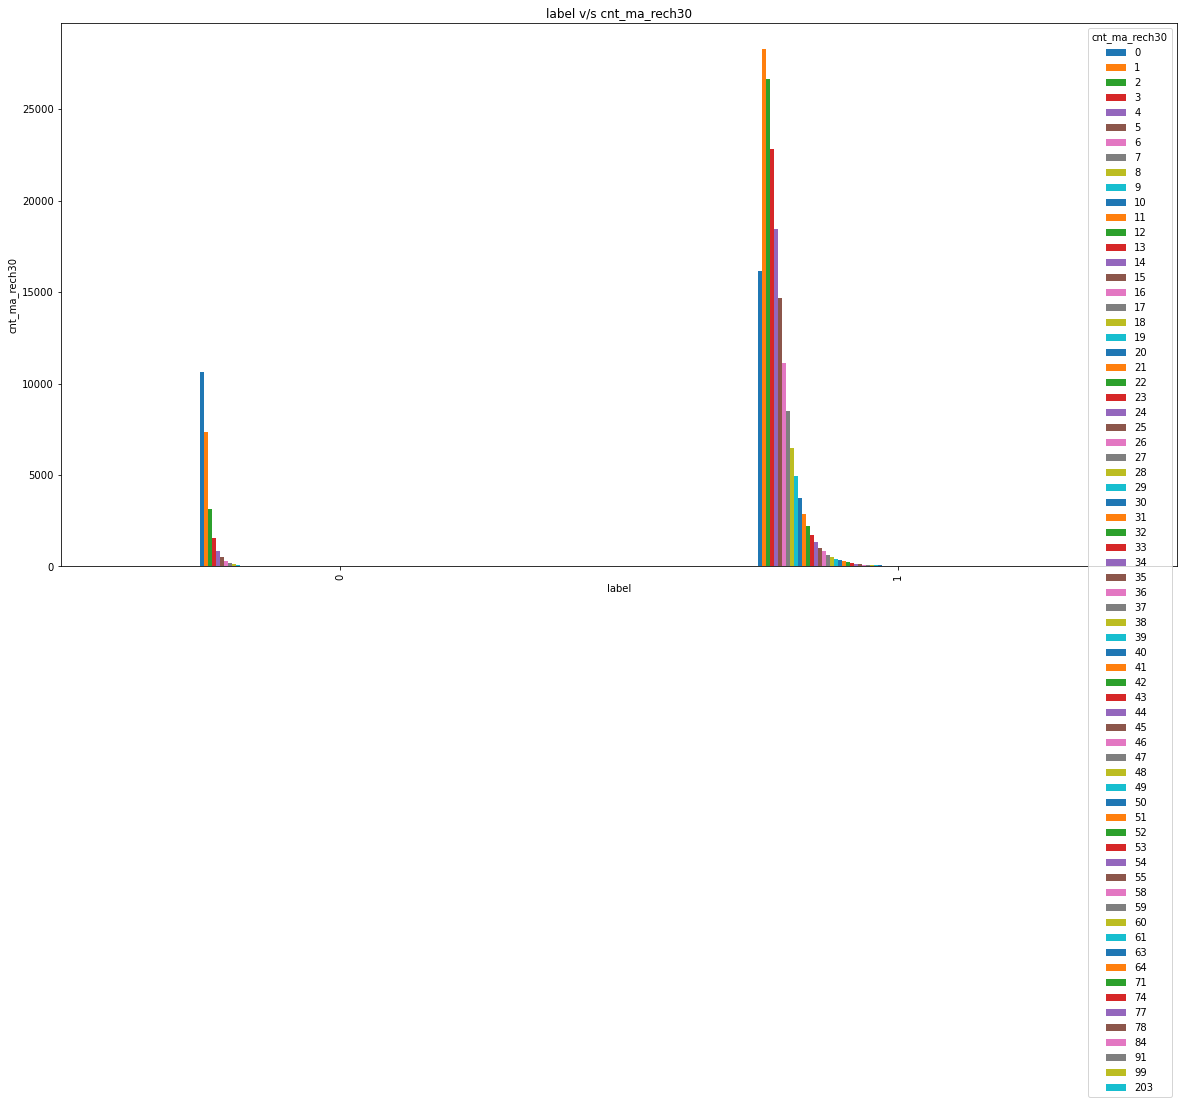

In [113]:
fig, ax = plt.subplots(figsize=(20,10))
tab5.plot(kind='bar',ax=ax)
plt.ylabel('cnt_ma_rech30')
plt.xlabel('label')
plt.title('label v/s cnt_ma_rech30')

OBSERVATIONS:
1. We can say that the people who have lower count of main account recharge in 30 days are more likely to be a defaulter. 
2. Also in the cross table one can observe with increase in the count of recharge, the label 0 indicationg defaulters decreases proportionally.
3. Label 1 increases and then decreases but not as proportionally as label 0.

12. medianamnt_loan30

0.0    186808
1.0      6815
0.5      6232
2.0       398
1.5        36
3.0         3
Name: medianamnt_loans30, dtype: int64


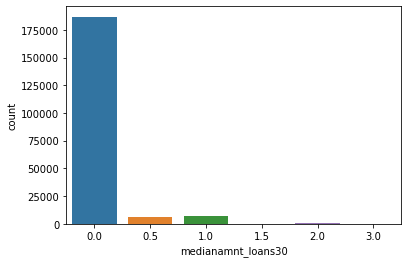

In [114]:
sns.countplot(data['medianamnt_loans30'])
print(data['medianamnt_loans30'].value_counts())

OBSERVATION: entry 0 stands at a high count of 1,86,808 users for median of amount of laons taken  by a user in last 30 days.

13. label v/s medianamnt_loans30

In [115]:
tab6=pd.crosstab(data['label'],data['medianamnt_loans30'])
tab6

medianamnt_loans30,0.0,0.5,1.0,1.5,2.0,3.0
label,,,,,,
0,24119,418,494,0,0,0
1,162689,5814,6321,36,398,3


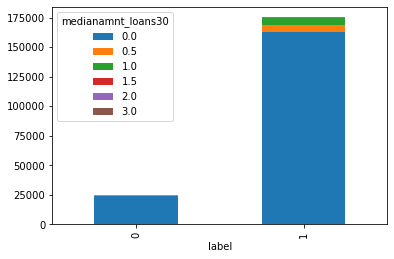

In [116]:
tab6.plot(kind='bar',stacked=True)

OBSERVATION: A huge difference between the labels is clear as we know the data is imbalanced. Still it can be observed that users with a lower median amounts are more liekly to be defaulters. 

14. cnt_loans30

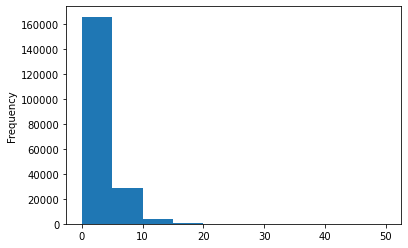

In [117]:
(data['cnt_loans30']).plot.hist(bins=10)

OBSERVATION: From histogram, it can be observed that mostly the users have taken 0-10 loans in a month.

15. label v/s cnt_loans30

In [118]:
tab7=pd.crosstab(data['label'],data['cnt_loans30'])
tab7

cnt_loans30,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,35,36,38,44,50
label,,,,,,,,,,,,,,,,,,,,,
0,0,19131,3578,1241,531,240,112,71,40,24,...,0,0,0,0,0,0,0,0,0,0
1,3115,60657,37116,24618,16176,10918,7319,4768,3188,2149,...,9,4,8,4,1,1,1,2,1,1


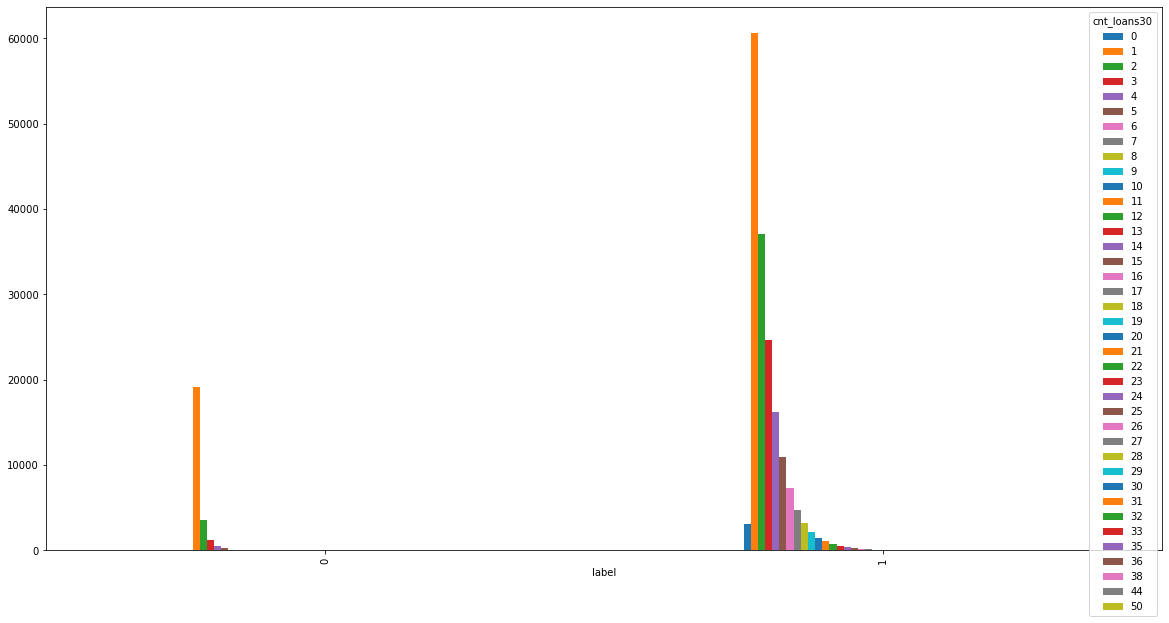

In [119]:
fig, ax = plt.subplots(figsize=(20,10))
tab7.plot(kind='bar',width=0.5,ax=ax)

OBSERVATIONS:
1. For 0 count of loans taken by a person there is no question of non-repayment.
2. Else, we can see a drastic fall in the defaulters as the count of loans increases i.e people who have taken lesser loan are likely to be defaulters.

16. maxamnt_loans30

6.0     172061
12.0     25116
0.0       3115
Name: maxamnt_loans30, dtype: int64


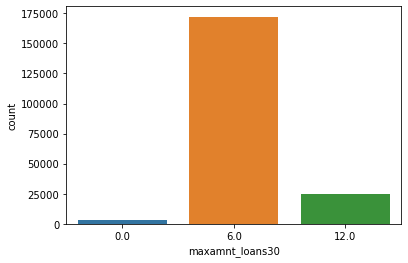

In [120]:
sns.countplot(data['maxamnt_loans30'])
print(data['maxamnt_loans30'].value_counts())

Mostly users have taken a loan of amount 6. Only around 3115 user have takne no loan indicted by 0.

17. label v/s maxamnt_loans30

In [121]:
tab8=pd.crosstab(data['label'],data['maxamnt_loans30'])
tab8

maxamnt_loans30,0.0,6.0,12.0
label,,,
0,0,24045,986
1,3115,148016,24130


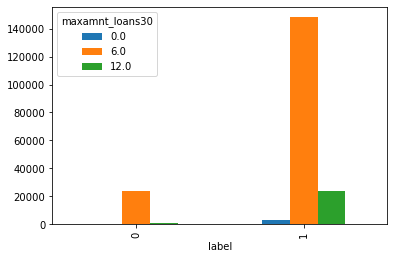

In [122]:
tab8.plot(kind='bar')

Users who have taken no loans are not defaulters as can be seen in the cross table. The number of users were highest for 6 which is reflected in the highest defaulter an non-defaulter count too.  But around 13% of the total users who have taken a maximum loan of 6 are defaulters and only 4% of those who have taken maximum credit of 12 are defaulters. Let us further analyze the relationship among the variable via correlation.

In [123]:
#Lets try and find more about the relation of variables via correlation heatmap.
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month,region_code,subscriber_number
label,1.000000,0.079136,0.168519,0.166289,0.057902,0.075425,-0.086698,0.024773,0.131957,0.237455,...,0.200339,0.200008,0.084093,0.036031,0.048607,0.049088,0.006793,0.154992,0.010027,0.001170
aon,0.079136,1.000000,0.056751,0.057722,0.066642,0.069709,0.025170,-0.005919,0.092987,-0.003463,...,0.062680,0.061508,0.037042,-0.004864,0.019264,0.036924,0.010606,0.068941,0.159373,-0.003039
daily_decr30,0.168519,0.056751,1.000000,0.977651,0.441127,0.459124,-0.084822,0.045165,0.277175,0.450701,...,0.501650,0.563814,0.400345,-0.037722,0.026658,0.046873,0.006802,0.518247,0.011096,0.000454
daily_decr90,0.166289,0.057722,0.977651,1.000000,0.433769,0.471900,-0.078319,0.045215,0.265405,0.426029,...,0.503828,0.567471,0.397166,-0.035112,0.019176,0.040453,-0.021199,0.538822,0.010894,0.000609
rental30,0.057902,0.066642,0.441127,0.433769,1.000000,0.954998,-0.036726,0.012454,0.134166,0.235043,...,0.268644,0.298114,0.232975,-0.035410,0.072835,0.094376,0.038787,0.361828,0.013086,-0.001948
rental90,0.075425,0.069709,0.459124,0.471900,0.954998,1.000000,-0.027412,0.017280,0.127820,0.231884,...,0.294255,0.327020,0.250101,-0.034347,0.066985,0.098672,0.010539,0.427025,0.013183,-0.001254
last_rech_date_ma,-0.086698,0.025170,-0.084822,-0.078319,-0.036726,-0.027412,1.000000,0.024894,0.222498,-0.255806,...,-0.187250,-0.183290,-0.057134,0.024776,-0.103139,-0.073461,-0.005597,0.025513,0.009579,-0.004921
last_rech_date_da,0.024773,-0.005919,0.045165,0.045215,0.012454,0.017280,0.024894,1.000000,0.016505,0.009822,...,0.004173,0.008990,0.027785,0.001283,-0.003611,0.021539,0.022223,0.073338,0.000038,0.000190
last_rech_amt_ma,0.131957,0.092987,0.277175,0.265405,0.134166,0.127820,0.222498,0.016505,1.000000,-0.002718,...,-0.009499,0.014722,0.149751,0.021044,-0.027510,-0.014494,0.028834,0.097625,0.023944,-0.003528
cnt_ma_rech30,0.237455,-0.003463,0.450701,0.426029,0.235043,0.231884,-0.255806,0.009822,-0.002718,1.000000,...,0.692132,0.685311,0.174229,-0.071687,0.043924,0.017870,0.068918,0.156215,-0.006496,0.000580


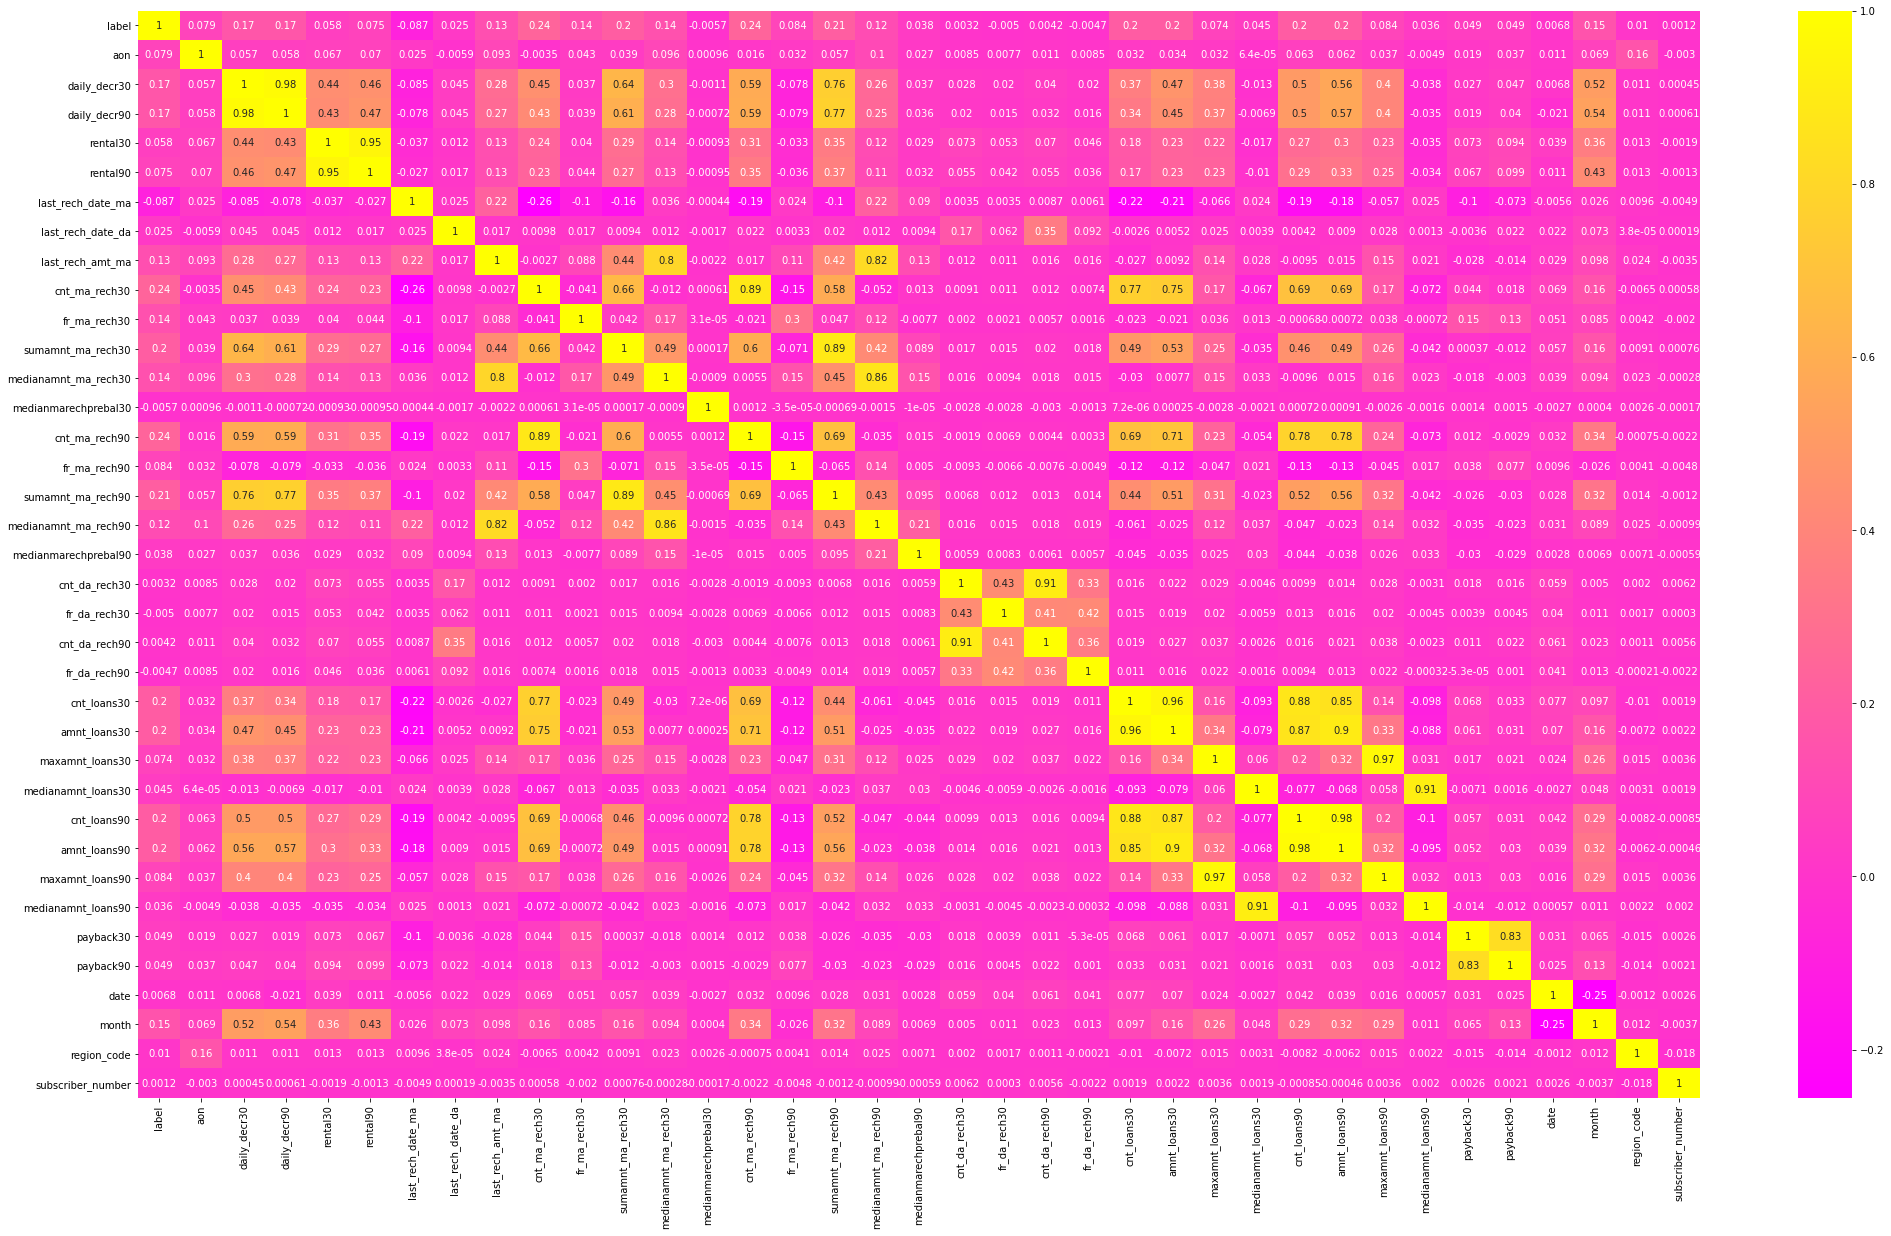

In [124]:
#Visualizing correlation in heatmap.
plt.figure(figsize=(35,20))
sns.heatmap(data.corr(),cmap='spring',annot=True)

A strong positive correlation can be observed between:
    1. rental30 an rental90
    2. daily_decr30 and daily_decr90
    3. cnt_da_rech30 and cnt_da_rech90
    4. cnt_loans30 and amnt_loans30
    5. amnt_loans30 and amnt_loans90
    6. maxamnt_loans30 and max_amntloans90
    7. medianamnt_loans30 and medianamnt_loans30
    8. cnt_loans90 and amnt_loans90

In [125]:
#Lets check for the skewness of the data
data.skew()

label                   -2.268183
aon                      0.951153
daily_decr30             3.950242
daily_decr90             4.274135
rental30                 4.608940
rental90                 4.497887
last_rech_date_ma        3.465031
last_rech_date_da        9.656091
last_rech_amt_ma         3.672275
cnt_ma_rech30            3.236347
fr_ma_rech30             1.991997
sumamnt_ma_rech30        6.408747
medianamnt_ma_rech30     3.459256
medianmarechprebal30    14.866952
cnt_ma_rech90            3.432974
fr_ma_rech90             2.291672
sumamnt_ma_rech90        4.907984
medianamnt_ma_rech90     3.732334
medianmarechprebal90    45.065603
cnt_da_rech30           23.894273
fr_da_rech30            30.916083
cnt_da_rech90           24.860799
fr_da_rech90            29.249915
cnt_loans30              2.703112
amnt_loans30             2.959135
maxamnt_loans30          1.427468
medianamnt_loans30       4.556655
cnt_loans90              2.982764
amnt_loans90             3.135759
maxamnt_loans9

In [126]:
#Removing skewness using PowerTransformer method
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [127]:
for i in data.skew().index[1:]:
    if data[i].skew()<-0.55:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))
    if data[i].skew()>0.55:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))
    else:
        data[i]=data[i]

In [128]:
data.skew()

label                   -2.268183
aon                     -0.057049
daily_decr30            -0.131053
daily_decr90            -0.121011
rental30                -0.040496
rental90                -0.041381
last_rech_date_ma        0.042229
last_rech_date_da        5.803896
last_rech_amt_ma        -0.062756
cnt_ma_rech30           -0.000128
fr_ma_rech30             0.136625
sumamnt_ma_rech30       -0.292169
medianamnt_ma_rech30    -0.191058
medianmarechprebal30    -0.027245
cnt_ma_rech90           -0.002452
fr_ma_rech90             0.143426
sumamnt_ma_rech90       -0.192363
medianamnt_ma_rech90    -0.044977
medianmarechprebal90     0.013906
cnt_da_rech30            8.078270
fr_da_rech30            19.683524
cnt_da_rech90            6.003940
fr_da_rech90            15.485022
cnt_loans30              0.036434
amnt_loans30             0.001936
maxamnt_loans30          0.413494
medianamnt_loans30       3.453463
cnt_loans90              0.097640
amnt_loans90            -0.009018
maxamnt_loans9

In [129]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month,region_code,subscriber_number
count,200292.000000,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,...,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,2.002920e+05,200292.000000,200292.000000,2.002920e+05,200292.000000
mean,0.875027,1.338717e-16,-2.887632e-16,9.047709e-17,1.967754e-16,8.151109e-16,-1.386665e-16,3.901764e-15,1.832390e-16,-6.936095e-17,...,-1.015201e-15,-8.250415e-17,-1.980646e-15,3.637575e-15,-5.359504e-16,2.596481e-15,14.395842,6.797990,-3.176464e-16,49751.718870
std,0.330689,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,8.437712,0.741349,1.000002e+00,28905.820839
min,0.000000,-3.474884e+00,-1.801534e+00,-1.809289e+00,-2.253841e+00,-2.274288e+00,-1.798481e+00,-1.674672e-01,-2.115382e+00,-1.693290e+00,...,-2.997429e+00,-3.664757e+00,-4.999296e+00,-2.481700e-01,-9.372018e-01,-1.018554e+00,1.000000,6.000000,-1.596197e+00,4.000000
25%,1.000000,-7.980990e-01,-9.484101e-01,-9.445443e-01,-6.707574e-01,-6.942042e-01,-8.307779e-01,-1.674672e-01,-4.323209e-01,-7.985977e-01,...,-1.034646e+00,-1.005847e+00,-2.861521e-01,-2.481700e-01,-9.372018e-01,-1.018554e+00,7.000000,6.000000,-4.600062e-01,24648.000000
50%,1.000000,9.764832e-03,2.003141e-01,1.907395e-01,-9.406871e-03,7.445609e-05,-2.418468e-04,-1.674672e-01,8.333012e-02,9.668398e-02,...,-1.895892e-01,-2.505382e-01,-2.861521e-01,-2.481700e-01,-9.372018e-01,2.141730e-01,14.000000,7.000000,-9.365789e-02,49083.000000
75%,1.000000,7.949230e-01,8.665154e-01,8.614461e-01,7.074116e-01,7.026213e-01,7.125699e-01,-1.674672e-01,4.496400e-01,6.206637e-01,...,8.821934e-01,7.431285e-01,-2.861521e-01,-2.481700e-01,9.361900e-01,8.542551e-01,21.000000,7.000000,8.166782e-01,75031.000000
max,1.000000,2.236888e+00,2.833765e+00,2.807358e+00,5.050811e+00,4.474977e+00,2.626208e+00,5.971367e+00,6.120740e+00,5.186281e+00,...,2.587258e+00,3.346699e+00,2.323936e+00,4.029505e+00,2.120559e+00,2.257973e+00,31.000000,8.000000,3.211858e+00,99998.000000


Analyzing again we can still see standard deviation higher for the features: date and subscriber number which is completely normal as date varies from min: 1 to max: 31 and subscriber number has min: 4 and max: 99998.

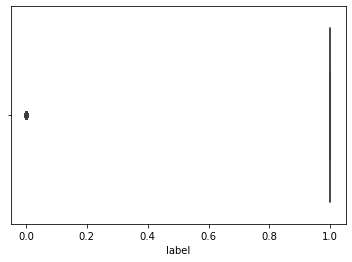

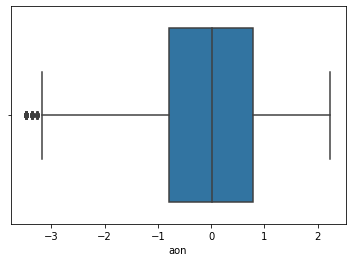

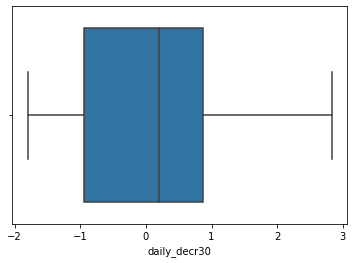

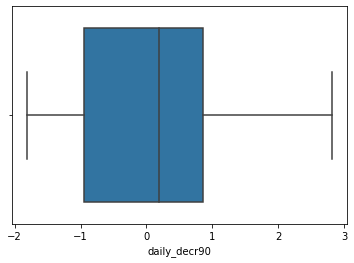

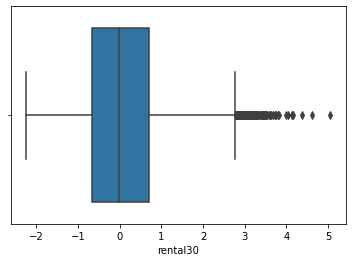

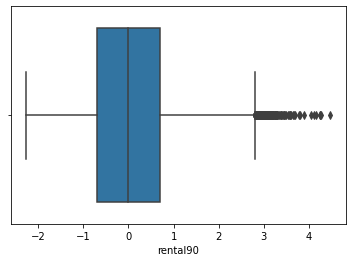

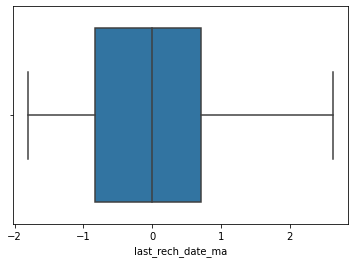

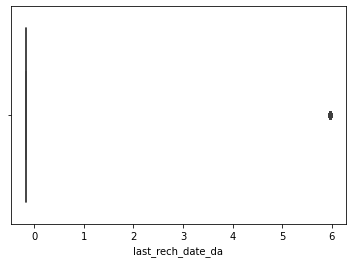

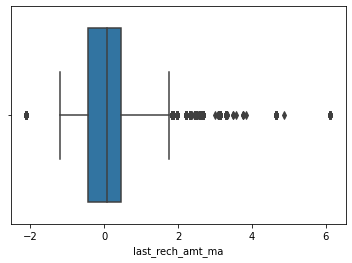

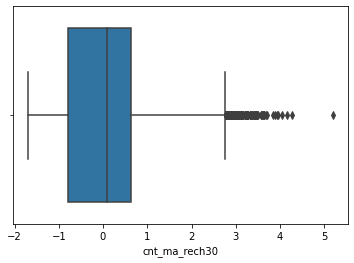

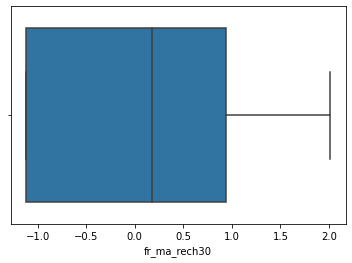

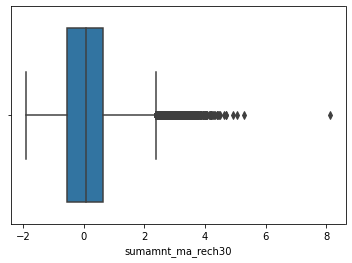

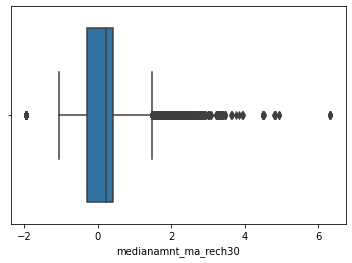

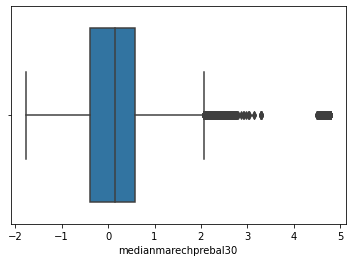

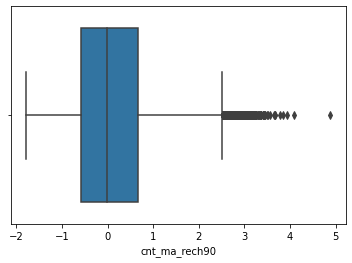

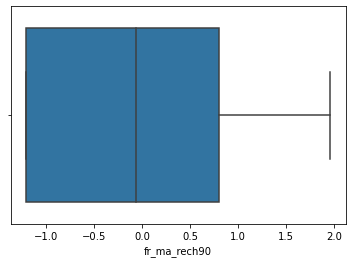

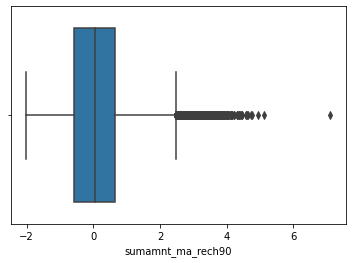

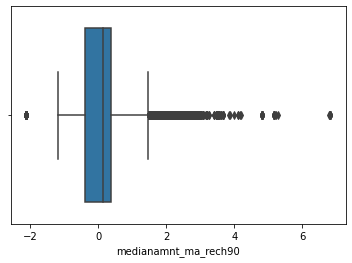

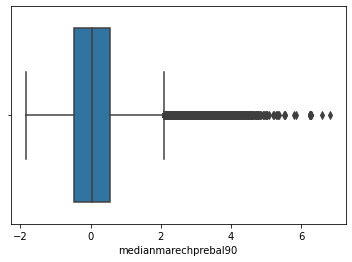

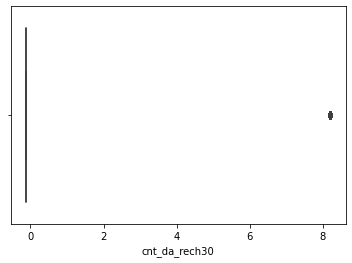

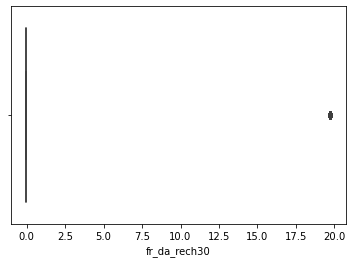

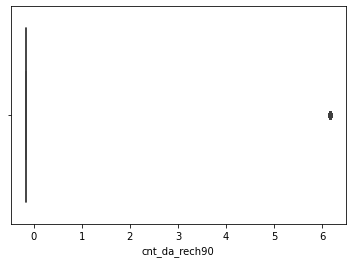

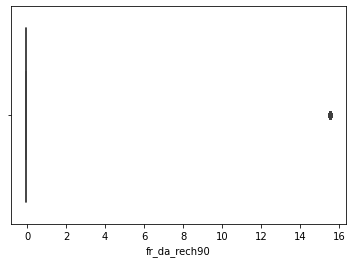

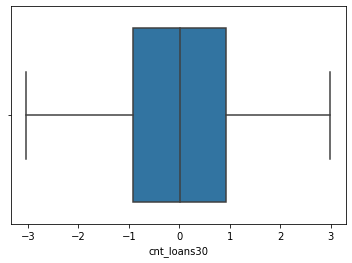

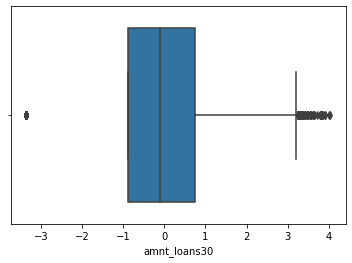

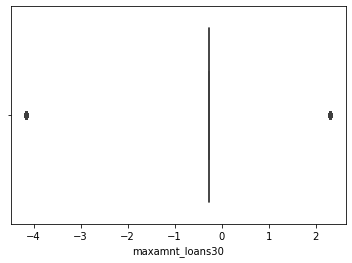

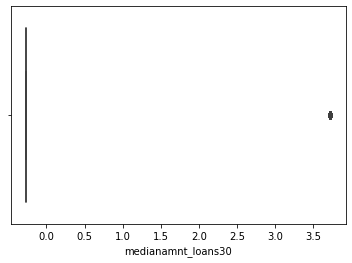

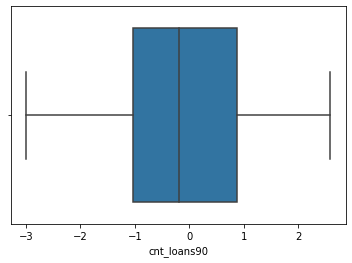

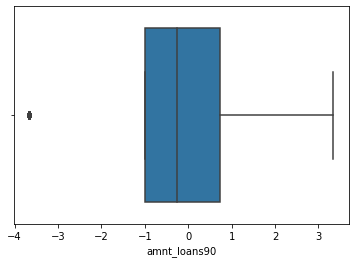

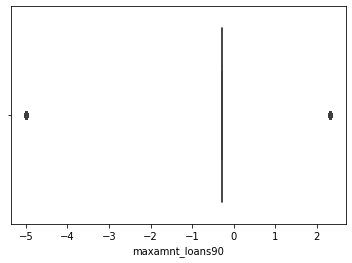

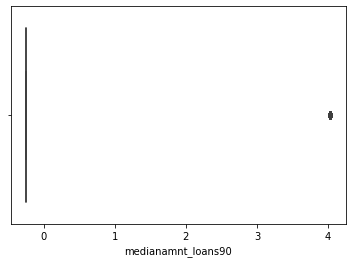

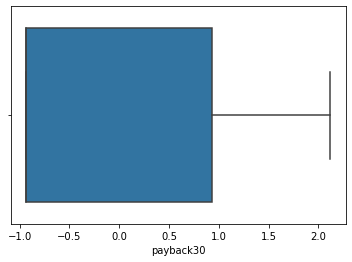

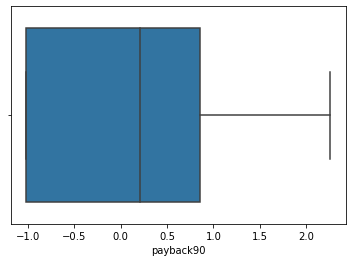

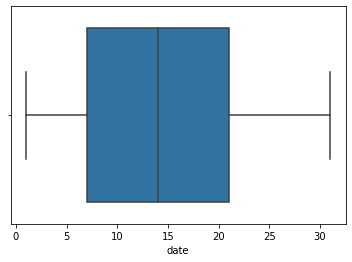

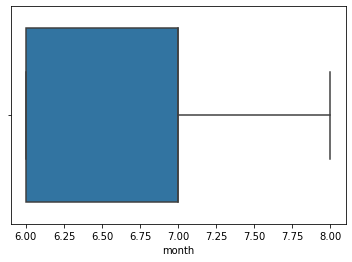

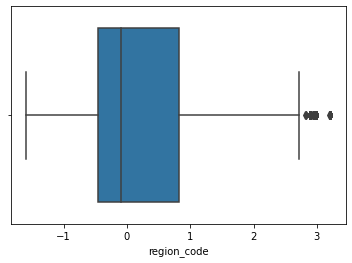

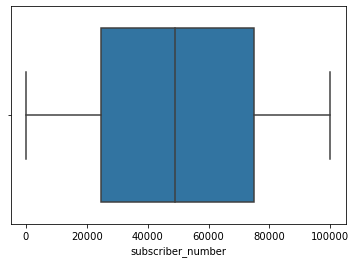

In [130]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

Outliers can still be seen in the features which i believe are continuous with the data and will consider keeping them so as to have no loss of information.

In [131]:
data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month,region_code,subscriber_number
0,0,-0.687845,0.491402,0.468799,-0.805602,-0.795246,-0.329609,-0.167467,0.083330,-0.274963,...,-0.189589,-0.250538,-0.286152,-0.24817,1.813160,1.783686,20,7,-1.570413,21408
1,1,0.395793,1.105873,1.058733,0.774081,0.613991,1.539949,-0.167467,1.502079,-0.798598,...,-1.034646,-0.250538,2.323936,-0.24817,-0.937202,-1.018554,10,8,-1.595955,76462
2,1,0.045490,0.178871,0.164325,-0.120711,-0.217521,-0.000242,-0.167467,0.083330,-0.798598,...,-1.034646,-1.005847,-0.286152,-0.24817,-0.937202,-1.018554,19,8,-1.596076,17943
3,1,-0.806056,-1.124703,-1.122438,-0.938371,-0.990069,2.034446,-0.167467,-0.291272,-1.693290,...,-0.189589,-0.250538,-0.286152,-0.24817,-0.937202,-1.018554,6,6,-1.570912,55773
4,1,0.771959,-0.587152,-0.586936,-0.008119,-0.112179,0.241227,-0.167467,0.449640,0.992556,...,1.220038,1.098128,-0.286152,-0.24817,0.639542,0.432030,22,6,-0.460396,3813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,-0.274553,-0.584618,-0.584430,-0.013217,-0.116945,-0.830778,-0.167467,1.051647,0.096684,...,-0.189589,-0.250538,-0.286152,-0.24817,0.095328,-0.097693,17,6,-0.093808,22758
209589,1,0.948200,-0.985279,-0.982793,0.263645,0.141194,0.241227,-0.167467,-0.429764,0.385026,...,0.305295,0.192675,-0.286152,-0.24817,0.095328,-0.097693,12,6,-0.224926,95583
209590,1,0.864904,1.094775,1.050358,1.122732,1.247364,-0.000242,-0.167467,0.083330,0.620664,...,1.069864,1.358549,2.323936,-0.24817,0.974542,0.753447,29,7,-0.093507,28556
209591,1,1.664996,1.120103,1.075400,-0.523353,-0.170636,-0.329609,5.971367,-0.429764,0.620664,...,0.305295,0.504155,2.323936,-0.24817,-0.937202,1.338008,25,7,-0.460006,59712


In [132]:
#Separating target varaible and other features.
x=data.drop('label',axis=1)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month,region_code,subscriber_number
0,-0.687845,0.491402,0.468799,-0.805602,-0.795246,-0.329609,-0.167467,0.083330,-0.274963,1.718858,...,-0.189589,-0.250538,-0.286152,-0.24817,1.813160,1.783686,20,7,-1.570413,21408
1,0.395793,1.105873,1.058733,0.774081,0.613991,1.539949,-0.167467,1.502079,-0.798598,-1.121983,...,-1.034646,-0.250538,2.323936,-0.24817,-0.937202,-1.018554,10,8,-1.595955,76462
2,0.045490,0.178871,0.164325,-0.120711,-0.217521,-0.000242,-0.167467,0.083330,-0.798598,-1.121983,...,-1.034646,-1.005847,-0.286152,-0.24817,-0.937202,-1.018554,19,8,-1.596076,17943
3,-0.806056,-1.124703,-1.122438,-0.938371,-0.990069,2.034446,-0.167467,-0.291272,-1.693290,-1.121983,...,-0.189589,-0.250538,-0.286152,-0.24817,-0.937202,-1.018554,6,6,-1.570912,55773
4,0.771959,-0.587152,-0.586936,-0.008119,-0.112179,0.241227,-0.167467,0.449640,0.992556,0.174647,...,1.220038,1.098128,-0.286152,-0.24817,0.639542,0.432030,22,6,-0.460396,3813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.274553,-0.584618,-0.584430,-0.013217,-0.116945,-0.830778,-0.167467,1.051647,0.096684,0.174647,...,-0.189589,-0.250538,-0.286152,-0.24817,0.095328,-0.097693,17,6,-0.093808,22758
209589,0.948200,-0.985279,-0.982793,0.263645,0.141194,0.241227,-0.167467,-0.429764,0.385026,-0.258515,...,0.305295,0.192675,-0.286152,-0.24817,0.095328,-0.097693,12,6,-0.224926,95583
209590,0.864904,1.094775,1.050358,1.122732,1.247364,-0.000242,-0.167467,0.083330,0.620664,1.130186,...,1.069864,1.358549,2.323936,-0.24817,0.974542,0.753447,29,7,-0.093507,28556
209591,1.664996,1.120103,1.075400,-0.523353,-0.170636,-0.329609,5.971367,-0.429764,0.620664,0.655287,...,0.305295,0.504155,2.323936,-0.24817,-0.937202,1.338008,25,7,-0.460006,59712


In [133]:
y=data['label']
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 200292, dtype: int64

In [134]:
x.shape, y.shape

((200292, 36), (200292,))

In [135]:
#Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mnm=MinMaxScaler()

In [136]:
x_new=mnm.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,date,month,region_code,subscriber_number
0,0.487946,0.494669,0.493451,0.198263,0.219141,0.331972,0.0,0.266960,0.206165,0.906156,...,0.502775,0.486949,0.643588,0.0,0.899469,0.855247,0.633333,0.5,0.005363,0.214053
1,0.677667,0.627232,0.621235,0.414520,0.427940,0.754500,0.0,0.439219,0.130051,0.000000,...,0.351458,0.486949,1.000000,0.0,0.000000,0.000000,0.300000,1.0,0.000050,0.764626
2,0.616336,0.427244,0.427499,0.292024,0.304739,0.406410,0.0,0.266960,0.130051,0.000000,...,0.351458,0.379224,0.643588,0.0,0.000000,0.000000,0.600000,1.0,0.000025,0.179401
3,0.467250,0.146017,0.148777,0.180087,0.190275,0.866259,0.0,0.221477,0.000000,0.000000,...,0.502775,0.486949,0.643588,0.0,0.000000,0.000000,0.166667,0.0,0.005259,0.557723
4,0.743524,0.261986,0.264771,0.307437,0.320347,0.460983,0.0,0.311436,0.390409,0.413592,...,0.755184,0.679301,0.643588,0.0,0.515653,0.442720,0.700000,0.0,0.236229,0.038092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200287,0.560304,0.262532,0.265314,0.306739,0.319641,0.218705,0.0,0.384529,0.260187,0.413592,...,0.502775,0.486949,0.643588,0.0,0.337675,0.281048,0.533333,0.0,0.312473,0.227554
200288,0.774380,0.176095,0.179025,0.344642,0.357888,0.460983,0.0,0.204662,0.302100,0.275425,...,0.591389,0.550161,0.643588,0.0,0.337675,0.281048,0.366667,0.0,0.285203,0.955847
200289,0.759797,0.624838,0.619421,0.462250,0.521783,0.406410,0.0,0.266960,0.336351,0.718385,...,0.728294,0.716443,1.000000,0.0,0.625210,0.540817,0.933333,0.5,0.312536,0.285537
200290,0.899875,0.630302,0.624845,0.236902,0.311686,0.331972,1.0,0.204662,0.336351,0.566904,...,0.591389,0.594586,1.000000,0.0,0.000000,0.719226,0.800000,0.5,0.236310,0.597116


In [137]:
#Checking for total defaulters as it is imbalanced data we need to balance it with one of the technique.
defaulter=data[data['label']==0]
non_defaulter=data[data['label']==1]

In [138]:
defaulter.shape,non_defaulter.shape

((25031, 37), (175261, 37))

As non defaulters are 175261 if we use upscaling we need minority class i.e 0 to have equal entries i.e. 175261 total the two will then sum up to 3,50,522.
When using dowscaling we scale the majority class down to the minority class which often leads to the information loss. Upscaling never causes any data loss instead it creates dummy entries to upscale the minorty class.

In [139]:
!pip install imblearn
from imblearn.combine import SMOTETomek

Using SMOTETomek for handling imbalanced data as it is a hybrid techniqure which uses under sampling method Tomek with an over sampling method SMOTE to handle the imbalanced data.

In [140]:
smk=SMOTETomek(random_state=42)

In [141]:
x_res,y_res=smk.fit_sample(x,y)

In [142]:
x_res.shape,y_res.shape

((350138, 36), (350138,))

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV

In [145]:
l=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for j in l:
        x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.30,random_state=42)
        j.fit(x_train,y_train)
        pred=j.predict(x_test)
        acc=accuracy_score(pred,y_test)
        print('Acccuracy score correspoding to ',j,'is: ',acc)
        print('\n')

Acccuracy score correspoding to  LogisticRegression() is:  0.7724434035909445


Acccuracy score correspoding to  DecisionTreeClassifier() is:  0.913710706193713


Acccuracy score correspoding to  SVC() is:  0.8659393385502941


Acccuracy score correspoding to  RandomForestClassifier() is:  0.952266712362674




In [146]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((245096, 36), (245096,), (105042, 36), (105042,))

In [147]:
lg=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [148]:
#Hyperparameter optimization using GridSearchCV for LogisticRegression
clf=GridSearchCV(lg,grid,cv=cv,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 1.0, 'penalty': 'l2'}


In [201]:
#Using GridSearchCv to find out best parameters for RandomForestClassifier
parameters={ 'n_estimators' :[100,200,300],'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 300}


In [86]:
#Using GridSearchCv to optimize hyper parameters for SVC
parameters={'kernel':['linear','poly','rbf']}
svc=SVC()
clf=GridSearchCV(svc,parameters,cv=cv,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'rbf'}


In [149]:
#Using GridSearchCV to optimize hyper parametres for DecisionTreeClassifier
parameters={'criterion':['entropy','gini']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy'}


In [150]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=300)
lg=LogisticRegression(C=1,penalty='l2')
sv=SVC(kernel='rbf')
dt=DecisionTreeClassifier(criterion='entropy')

In [151]:
Model=[]
Model.append(('RandomForestClassifier',rf))
Model.append(('LogisticRegression',lg))
Model.append(('SVC',sv))
Model.append(('DecisionTreeClassifier',dt))

RandomForestClassifier :

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.9528283924525428


F1 score: 0.9528252487266149
Cross Val Score:  0.9216094533816402


AUC_ROC_Score 0.9528319263482736


[[50047  2577]
 [ 2378 50040]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     52624
           1       0.95      0.95      0.95     52418

    accuracy                           0.95    105042
   macro avg       0.95      0.95      0.95    105042
weighted avg       0.95      0.95      0.95    105042



AxesSubplot(0.125,0.808774;0.775x0.0712264)


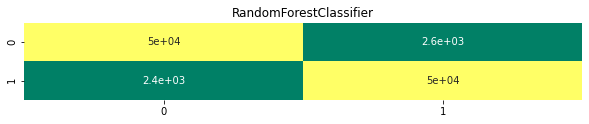

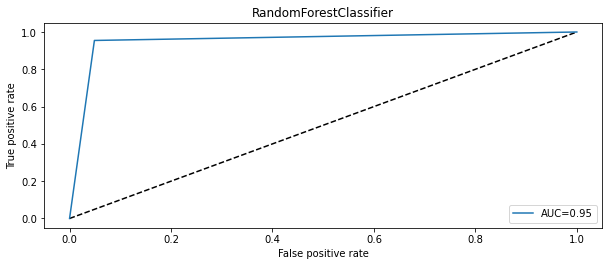



LogisticRegression :

LogisticRegression(C=1)


Accuracy Score:  0.7724434035909445


F1 score: 0.7682043424714655
Cross Val Score:  0.8829658721307585


AUC_ROC_Score 0.7724105094591213


[[41530 11094]
 [12809 39609]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.78     52624
           1       0.78      0.76      0.77     52418

    accuracy                           0.77    105042
   macro avg       0.77      0.77      0.77    105042
weighted avg       0.77      0.77      0.77    105042



AxesSubplot(0.125,0.808774;0.775x0.0712264)


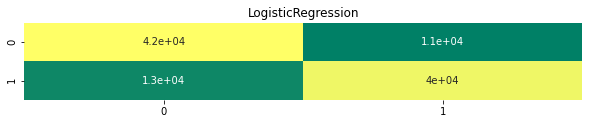

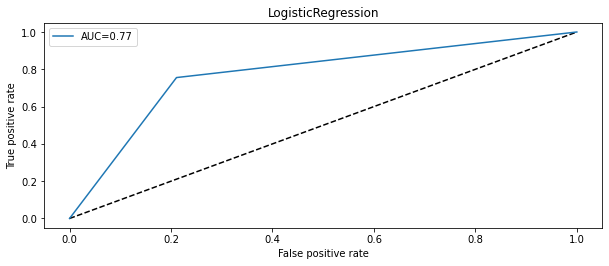



SVC :

SVC()


Accuracy Score:  0.8659393385502941


F1 score: 0.8632815533980582
Cross Val Score:  0.913626104376867


AUC_ROC_Score 0.8659045449417928


[[46501  6123]
 [ 7959 44459]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87     52624
           1       0.88      0.85      0.86     52418

    accuracy                           0.87    105042
   macro avg       0.87      0.87      0.87    105042
weighted avg       0.87      0.87      0.87    105042



AxesSubplot(0.125,0.808774;0.775x0.0712264)


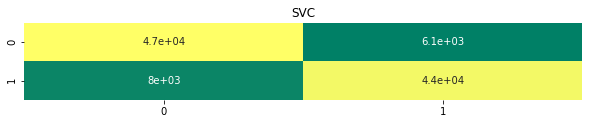

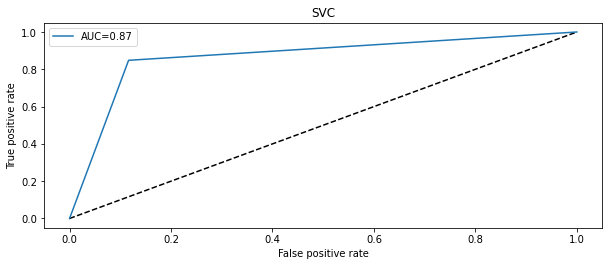



DecisionTreeClassifier :

DecisionTreeClassifier(criterion='entropy')


Accuracy Score:  0.9175853468136554


F1 score: 0.9169600291603918
Cross Val Score:  0.8852425515990655


AUC_ROC_Score 0.917574107931262


[[48588  4036]
 [ 4621 47797]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     52624
           1       0.92      0.91      0.92     52418

    accuracy                           0.92    105042
   macro avg       0.92      0.92      0.92    105042
weighted avg       0.92      0.92      0.92    105042



AxesSubplot(0.125,0.808774;0.775x0.0712264)


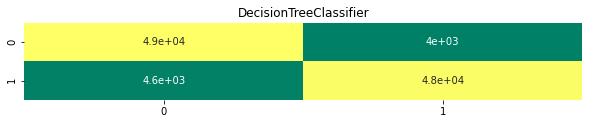

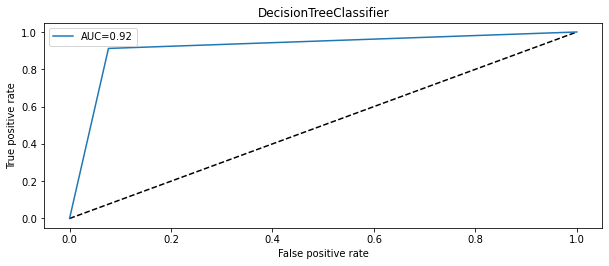

In [152]:
Models=[]
Score=[]
CVS=[]
Roc_Score=[]
F1=[]

for name,model in Model:
    print(name,':\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score: ',AS)
    Score.append(AS*100)
    print('\n')
    
    #F1 score
    f1=f1_score(y_test,pred)
    print('F1 score:',f1)
    F1.append(f1)
    
    #cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Val Score: ',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Roc_Score.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='summer'))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='Lower Right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [153]:
pd.DataFrame({"Model":Model,"Accuracy Score":Score,"F1 Score":F1,'Cross Val Score':CVS,'ROC_AUC_Score':Roc_Score})

,Model,Accuracy Score,F1 Score,Cross Val Score,ROC_AUC_Score
0,"(RandomForestClassifier, (DecisionTreeClassifi...",95.282839,0.952825,92.160945,95.283193
1,"(LogisticRegression, LogisticRegression(C=1))",77.244340,0.768204,88.296587,77.241051
2,"(SVC, SVC())",86.593934,0.863282,91.362610,86.590454
3,"(DecisionTreeClassifier, DecisionTreeClassifie...",91.758535,0.916960,88.524255,91.757411


In [154]:
#Saving Random forest classifier as it has accuracy score of 0.95 cross val score of 0.92, F1 score 0.95. Also being a bagging classifier this model doesnot overfit.
import joblib
joblib.dump(rf,'credit_defaulter.pkl')

['credit_defaulter.pkl']